<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module4_AllLabs_AIML_-/blob/main/MODULE4_LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 4 : Perceptron and Gradient Descent**

Lab 3:Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

# **Creating the Data**

In [3]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

(0.0, 2.0, 0.0, 15.0)

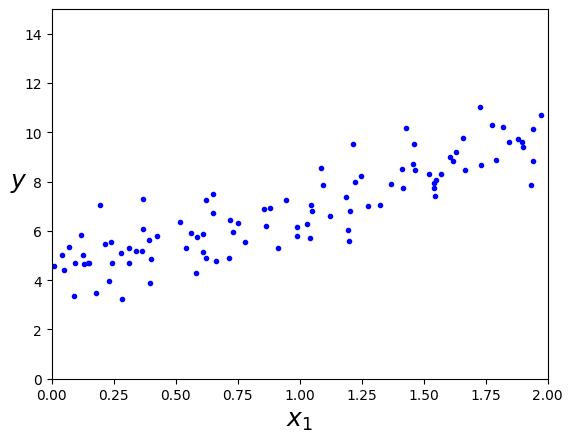

In [4]:
plt.plot(X,y,'b.')
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([0,2,0,15])

In [5]:
def cal_cost(y_prede,x,y):
  m=len(y)
  prediction=X.dot(y_pred)
  cost=(1/2*m)*np.sum(np.square(prediction-y))
  return cost

In [10]:
def gradient_descent(X, y, y_pred, learning_rate=0.05, iterations=60):
  m = len(y)
  cost_history = np.zeros(iterations)
  y_pred_history = np.zeros((iterations, y_pred.shape[0]))
  for i in range(iterations):
    prediction = np.dot(X, y_pred)
    y_pred = y_pred - (1/m) * learning_rate * (X.T.dot((prediction - y)))
    y_pred_history[i, :] = y_pred.T
    cost_history[i] = cal_cost(y_pred, X, y)
  return y_pred, cost_history, y_pred_history

In [12]:
def cal_cost(y_prede, x, y):
  m = len(y)
  prediction = x.dot(y_prede)
  cost = (1/(2*m)) * np.sum(np.square(prediction - y))
  return cost

In [13]:
lr=0.05
n_iter=1500
y_pred=np.random.randn(2,1)
X_b=np.c_[np.ones((len(X),1)),X]
y_pred,cost_history,y_pred_history=gradient_descent(X_b,y,y_pred,lr,n_iter)
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0],y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 0.403


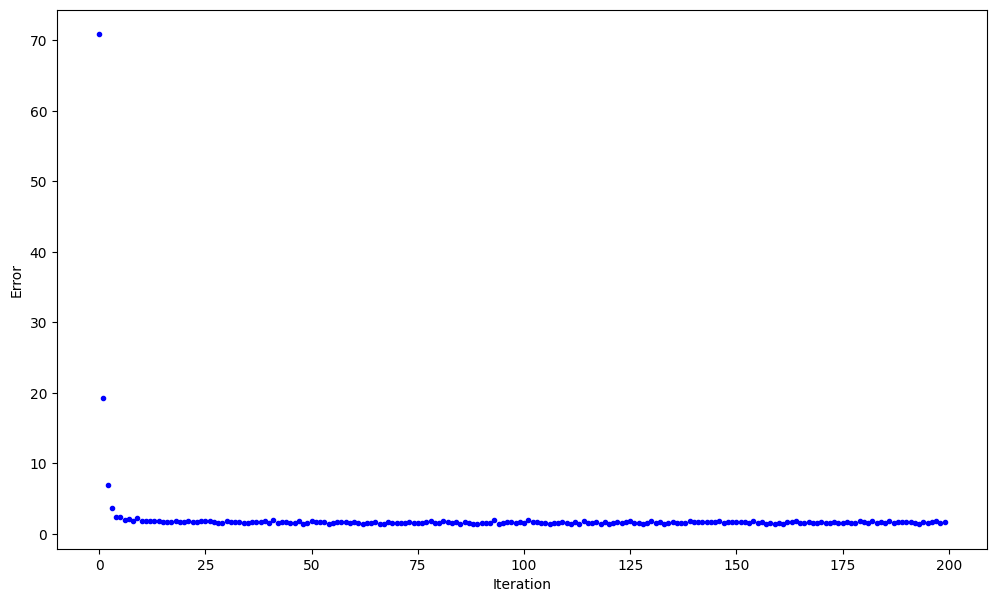

In [26]:
fig,ax=plt.subplots(figsize=(12,7))
ax.set_ylabel('Error')
ax.set_xlabel('Iteration')
ax.plot(np.arange(n_iter),cost_history,'b.')

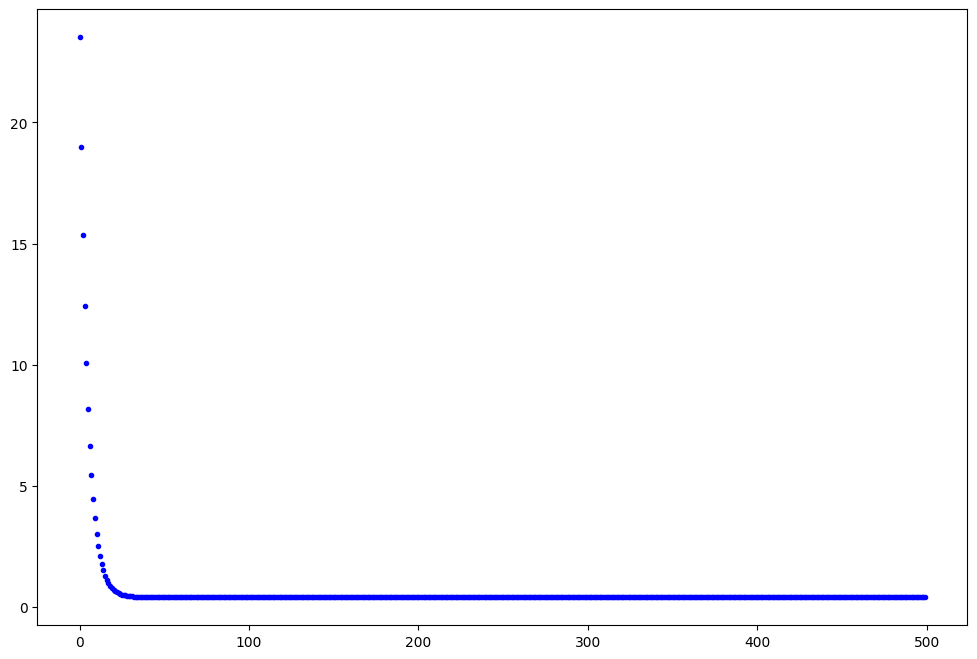

In [15]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(range(500),cost_history[:500],'b.')

# **Stochastic Gradient Descent**

In [16]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.03, iterations=15):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [17]:
lr = 0.6
n_iter = 10
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.880
y_pred[1]: 3.002
Final error: 49.160


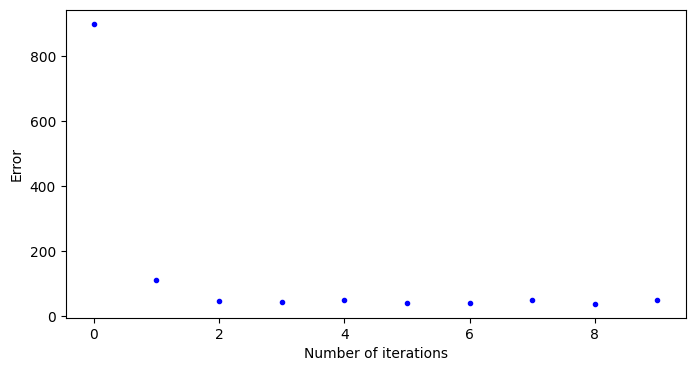

In [18]:
fig, ax = plt.subplots(figsize=(8,4))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(3,1)

ax.plot(range(n_iter), cost_history, 'b.')

# **Mini Batch Gradient Descet**

In [20]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.03, iterations=15, batch_size=30):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it]  = cost
    return y_pred, cost_history

In [21]:
lr = 0.3
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.211
y_pred[1]: 2.764
Final error: 1.729


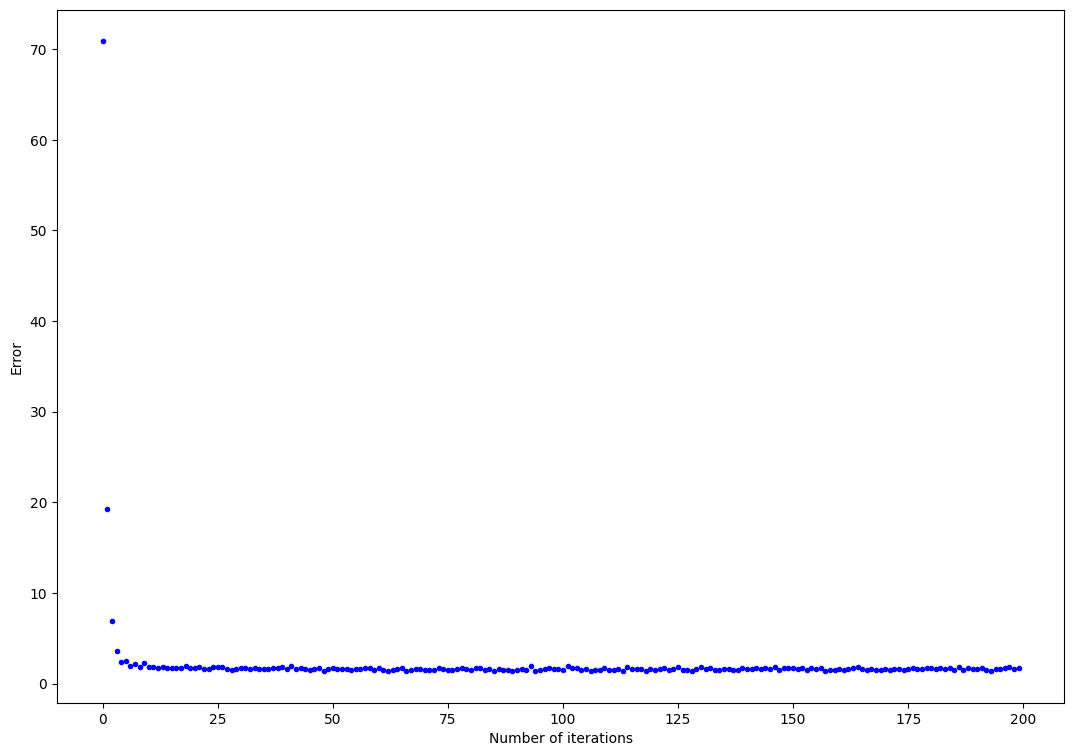

In [25]:
fig, ax = plt.subplots(figsize=(13,9))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# **Try Questions**

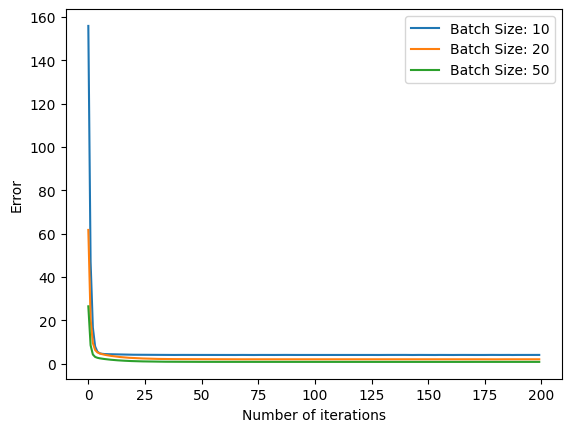

In [27]:
# 1.Change batch size in mini-batch gradient descent.

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.03, iterations=15, batch_size=30):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]
            X_i = np.c_[np.ones((len(X_i), 1)), X_i]
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)
        cost_history[it] = cost

    return y_pred, cost_history

batch_sizes = [10, 20, 50]
lr = 0.3
n_iter = 200

for batch_size in batch_sizes:
    y_pred = np.random.randn(2, 1)
    y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)
    plt.plot(range(n_iter), cost_history, label=f'Batch Size: {batch_size}')

plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend()
plt.show()


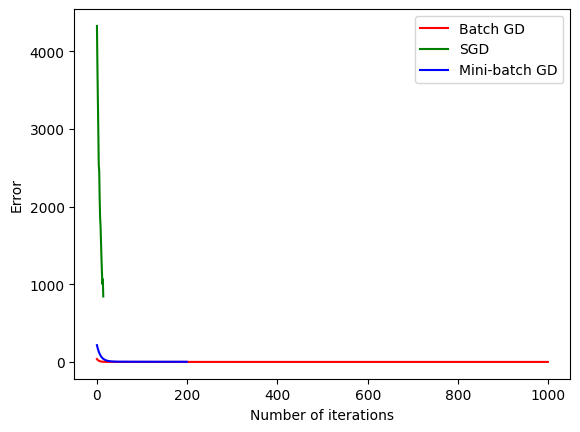

In [30]:
# Test all three methods
X_b_real = np.c_[np.ones((len(X), 1)), X]  # Changed X_real to X
y_pred_init = np.random.randn(X_b_real.shape[1], 1)

# Test Batch Gradient Descent
y_pred_bg, cost_history_bg, _ = gradient_descent(X_b, y, y_pred_init.copy(), learning_rate=0.05, iterations=1000)

# Test Stochastic Gradient Descent

y_pred_sgd, cost_history_sgd = stocashtic_gradient_descent(X_b, y, y_pred_init.copy(), learning_rate=0.03, iterations=15)

# Test Mini-batch Gradient Descent
y_pred_mbg, cost_history_mbg = minibatch_gradient_descent(X, y, y_pred_init.copy(), learning_rate=0.03, iterations=200, batch_size=20)

plt.plot(range(1000), cost_history_bg, 'r', label='Batch GD')
plt.plot(range(15), cost_history_sgd, 'g', label='SGD')
plt.plot(range(200), cost_history_mbg, 'b', label='Mini-batch GD')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

# **Additional Critical Thinking Question**


**Which of the following is TRUE, given the optimal learning rate?**

(i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

(ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

(iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

(iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

(vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

Correct Statement is
**(iii)** For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

   Convex functions have a single global minimum.
  BGD provides deterministic and smooth convergence.
  SGD introduces variability, which can help in escaping local minima in non-convex problems but can hinder convergence in convex ones without careful tuning.